<a href="https://colab.research.google.com/github/nsubbaian/FrequentistML/blob/master/Project1/FMLAssignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Frequentist Machine Learning Assigment 1: Linear Regression** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import linear_model
import statistics 
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Selected Dataset: http://archive.ics.uci.edu/ml/datasets/Forest+Fires
# Dataset Description: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names
# Chosen so it's good for regression (with numerical, not categorical features, and the target is a continuous number)

dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

# removed categorical feautures
dataset = dataset.drop(columns = {'month', 'day'})

# Shuffle and then split training data into 80% train, 10% validation and 10% test
training, validation, test = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])
print("Length of dataset:", len(dataset))
print( "Length of training:", len(training))
print("Length of validation:", len(validation))
print("Length of test:", len(test))

training

Length of dataset: 517
Length of training: 413
Length of validation: 52
Length of test: 52


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
192,2,2,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,8.71
24,7,4,93.5,139.4,594.2,20.3,23.7,32,5.8,0.0,0.00
15,6,5,93.3,141.2,713.9,13.9,22.9,44,5.4,0.0,0.00
343,8,6,91.5,130.1,807.1,7.5,15.9,51,4.5,0.0,2.18
258,3,4,91.8,170.9,692.3,13.7,20.6,59,0.9,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
500,8,6,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
59,2,2,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
485,2,4,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,2.07
188,6,4,90.8,41.9,89.4,7.9,13.3,42,0.9,0.0,7.40


### A. Plain old linear regression, with no regularization

In [3]:
linTrain_X, linTrain_Y = training.iloc[:, :10], np.log(training.iloc[:, 10]+1)
linTest_X, linTest_Y = test.iloc[:, :10], np.log(test.iloc[:,10]+1)

#  Using eq 3.6 to find the betas
beta_hat = np.linalg.inv(linTrain_X.T.dot(linTrain_X)).dot(linTrain_X.T).dot(linTrain_Y)

y_hat = linTest_X.dot(beta_hat)

# mean squared error on training dataset
y_hat_training = linTrain_X.dot(beta_hat)
linTrainMSE = np.square(np.subtract(linTrain_Y,y_hat_training)).mean() 
print("Linear Regression MSE on training set:", linTrainMSE)

# mean squared error on the test dataset
linTestMSE = np.square(np.subtract(linTest_Y,y_hat)).mean() 
print("Linear Regression MSE on test set:", linTestMSE)
# display(pd.concat([linTest_Y, y_hat, np.subtract(linTest_Y,y_hat)], axis=1))

Linear Regression MSE on training set: 1.9782305299919727
Linear Regression MSE on test set: 1.8148573656030083


### B. Ridge Regression 

Lambda selected by cross-validation: 1e-15
selected Lambda on validation set MSE: 1.3690154749151189
selected Lambda on training set MSE: 1.3690154749151189
Ridge Regression MSE on test set: 1.680945316530964


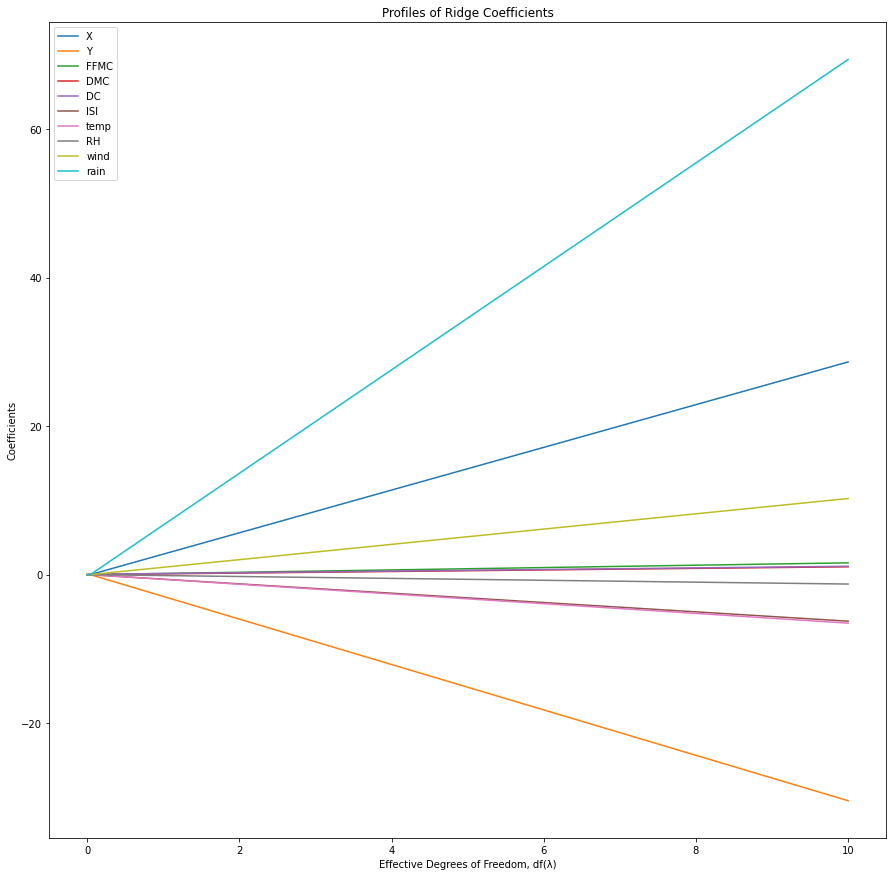

In [41]:
RidgeTrain_X, RidgeTrain_Y = training.iloc[:, :10], np.log(training.iloc[:, 10]+1)
RidgeVal_X, RidgeVal_Y = validation.iloc[:, :10], np.log(validation.iloc[:, 10]+1)
RidgeTest_X, RidgeTest_Y = test.iloc[:, :10], np.log(test.iloc[:,10]+1)
identity = np.identity(RidgeTrain_X.shape[1])
bestMSE = float('inf')
features = list(RidgeTrain_X.columns.values)

# normalize input features, this way the penalty is equal per feature
RidgeTrain_X = preprocessing.normalize(RidgeTrain_X)
RidgeVal_X = preprocessing.normalize(RidgeVal_X)
RidgeTest_X = preprocessing.normalize(RidgeTest_X)

# some lambda values reccomended from scikitlearn
for lam in [1e-15, 1e-5, .1, 1,1e-4, 1e-2,1e-3, 1, 5, 10]:

  # using eq 3.44 to find the betas
  betaRidge_hat = np.linalg.inv((RidgeTrain_X.T.dot(RidgeTrain_X) + lam*(identity))).dot(RidgeTrain_X.T).dot(RidgeTrain_Y)
  y_hat = RidgeVal_X.dot(betaRidge_hat)

  # select the optimal value of Lambda by cross-validation using the validation dataset
  ridgeMSE = np.square(np.subtract(RidgeVal_Y,y_hat)).mean()

  if (ridgeMSE < bestMSE):
    bestLambda = lam
    bestMSE = ridgeMSE

print("Lambda selected by cross-validation:", bestLambda)
print("selected Lambda on validation set MSE:", bestMSE)

betaRidge_hat = np.linalg.inv((RidgeTrain_X.T.dot(RidgeTrain_X) + bestLambda*(identity))).dot(RidgeTrain_X.T).dot(RidgeTrain_Y)
y_hat = RidgeTrain_X.dot(betaRidge_hat)
print("selected Lambda on training set MSE:", bestMSE)

# Report the mean squared error on the test dataset, using the best lambda you found on the validation set.
# DO NOT USE THE TEST DATASET TO CHOOSE LAMBDA.
betaRidge_hat = np.linalg.inv((RidgeTrain_X.T.dot(RidgeTrain_X) + bestLambda*(identity))).dot(RidgeTrain_X.T).dot(RidgeTrain_Y)
y_hat = RidgeTest_X.dot(betaRidge_hat)
ridgeMSE = np.square(np.subtract(linTest_Y,y_hat)).mean() 
print("Ridge Regression MSE on test set:", ridgeMSE)

# Ridge Coefficients plotted as a function of degrees of freedom
X = []
Y = []
for lam in np.arange(0, 10000000, 10000):
  betaRidge_hat = np.linalg.inv((RidgeTrain_X.T.dot(RidgeTrain_X) + lam*(identity))).dot(RidgeTrain_X.T).dot(RidgeTrain_Y)
  dofFreedom = np.matrix(RidgeTrain_X.dot(np.linalg.inv((RidgeTrain_X.T.dot(RidgeTrain_X) + lam*(identity))).dot(RidgeTrain_X.T)))
  X.append(dofFreedom.trace()[0,0])
  Y.append(betaRidge_hat)

plt.figure(figsize=(15,15))
for i in range(0,10):
  plt.plot(X, list(map(list, zip(*Y)))[i], label = features[i] )
plt.legend()
plt.title("Profiles of Ridge Coefficients")
plt.xlabel('Effective Degrees of Freedom, df(λ)')
plt.ylabel('Coefficients') 
plt.show()


### C. Lasso Regression

Lambda selected by cross-validation: 1e-15
Lasso Regression MSE on validation set: 1.498415678987989
Lasso Regression MSE on training set: 1.9792433657565822
Lasso Regression MSE on test set: 16.902178486255533


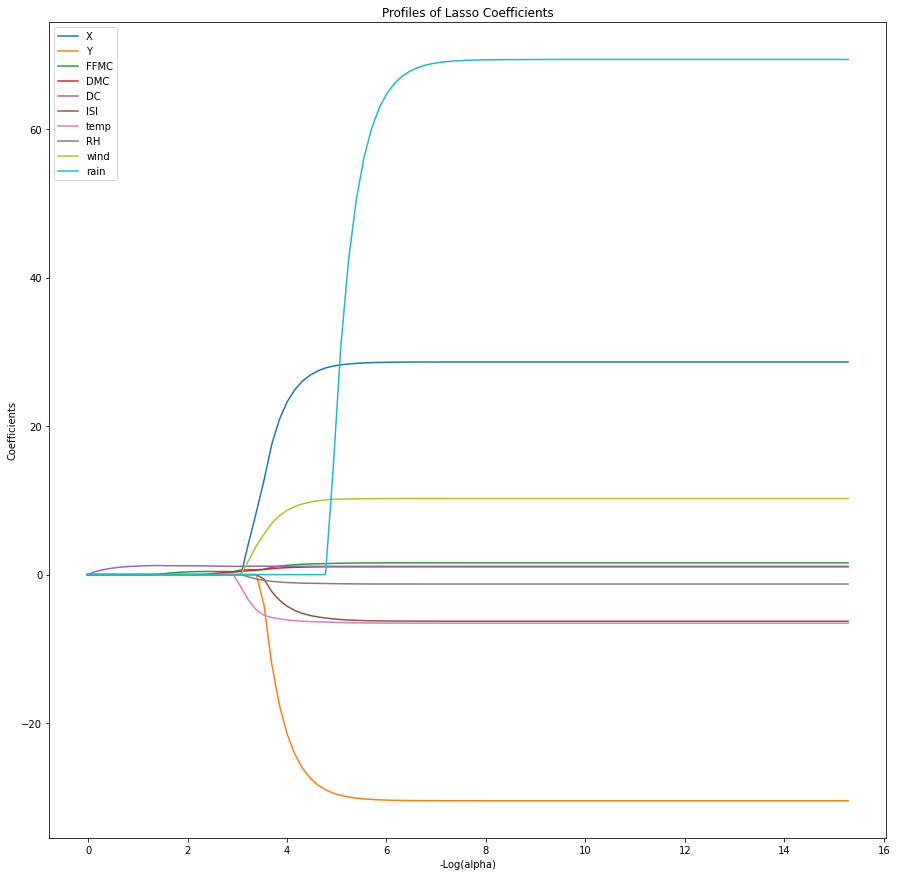

In [56]:
LassoTrain_X, LassoTrain_Y = training.iloc[:, :10], np.log(training.iloc[:, 10]+ 1)
LassoVal_X, LassoVal_Y = validation.iloc[:, :10], np.log(validation.iloc[:, 10]+1)
LassoTest_X, LassoTest_Y = test.iloc[:, :10], np.log(test.iloc[:,10]+.01)
bestMSE = float('inf')

# using sci-kit learn or MATLAB
LassoTrain_X = preprocessing.normalize(LassoTrain_X)
LassoVal_X = preprocessing.normalize(LassoVal_X)
LassoTest_X = preprocessing.normalize(LassoTest_X)

# select the optimal value of lambda as in part B.
for lam in [1e-15, 1e-5, .1, 1,1e-4, 1e-2,1e-3, 1, 5, 10]:
    clf = linear_model.Lasso(alpha=lam)
    clf.fit(LassoTrain_X, LassoTrain_Y)
    y_hat = clf.predict(LassoVal_X)

    LassoMSE = np.square(np.subtract(LassoVal_Y,y_hat)).mean() 
    if (LassoMSE < bestMSE):
      bestLambda = lam
      bestMSE = LassoMSE
    
print("Lambda selected by cross-validation:", bestLambda)
print("Lasso Regression MSE on validation set:", LassoMSE)

clf = linear_model.Lasso(alpha=bestLambda)
clf.fit(LassoTrain_X, LassoTrain_Y)
y_hat = clf.predict(LassoTrain_X)
lassoMSE_train = np.square(np.subtract(LassoTrain_Y,y_hat)).mean() 
print("Lasso Regression MSE on training set:", lassoMSE_train)

clf = linear_model.Lasso(alpha=bestLambda)
clf.fit(LassoTrain_X, LassoTrain_Y)
y_hat = clf.predict(LassoTest_X)
LassoMSE_test = np.square(np.subtract(LassoTest_Y,y_hat)).mean() 
print("Lasso Regression MSE on test set:", LassoMSE_test)

# Display a Lasso plot (there are built in functions for Lasso plot in sci-kit/MATLAB). 
alphas, coefs, _ = linear_model.lasso_path(LassoTrain_X, LassoTrain_Y, eps=5e-16)
fig, ax = plt.subplots(figsize=[15,15])

for i in range(len(coefs)): 
    ax.plot((-np.log10(alphas)), coefs[i].T, label = features[i])

# Sci-kit learn had the plot against -Log(alpha) instead of the shrinkage factor as shown in book
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.title('Profiles of Lasso Coefficients')
plt.legend()
plt.axis('tight')
plt.show()

From the plot, it seems that the DC and FFMC are the first coefficients to diverge from 0. DC is "DC index from the FWI system: 7.9 to 860.6", FFMC is "FFMC index from the FWI system: 18.7 to 96.20", and Y is "y-axis spatial coordinate within the Montesinho park map: 2 to 9". 

According to nwcg.gov, "The Fine Fuel Moisture Code (FFMC) represents fuel moisture of forest litter fuels under the shade of a forest canopy", and "The Drought Code (DC), much like the Keetch-Byrum Drought Index, represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels." These features in particular seem to be related to forest fires, perhaps more so than other features such as wind speed or temperature in predicting the burned area of the forest.


Based on the MSE on the training dataset and the test dataset for the three methods, the MSE on the training datasets was higher for Linear, lower for Ridge, and much lower for Lasso. In class we discussed that performance in training will decrease but performance in validation will increase. Specifically for lasso, you want to see consistency in performance between val + test. If you have great performance under training but not test, that is bad.